## Cle Elum Ridge (CER) Treatment Manuscript Scripts 
## `7_canopy_cover` 
### First Notecook to calculate the percent canopy cover for each BAF

Notebook contents 
* Calculate the percentage canopy cover on Cle Elum Ridge 
* Make some figures of percent canopy cover, with BAF and CDFs

created by Cassie Lumbrazo\
last updated: June 2024\
run location: locally\
python environment: **raster**

In [63]:
# import packages 
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_theme()
# plt.rcParams['figure.figsize'] = [12,6] #overriding size

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime

import geopandas as gpd

import scipy

In [64]:
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
from matplotlib import ticker

In [65]:
# Paths for local machine
ds = xr.open_dataset('C:\\Users\\Lumbr\\OneDrive - UW/Documents\\Washington\\EasternCascades\\Python\\CER_treatment_manuscript\\cer_treatment_region_dataset_all_variables.nc') 

In [66]:
ds

<xarray.Dataset>
Dimensions:                           (x: 2564, y: 1388, band: 1)
Coordinates:
  * x                                 (x) float64 4.65e+05 ... 4.676e+05
  * y                                 (y) float64 2.111e+05 ... 2.097e+05
  * band                              (band) int32 1
    spatial_ref                       int32 ...
Data variables: (12/339)
    chmws_rapid                       (band, y, x) float32 ...
    dce_rapid                         (band, y, x) float32 ...
    giulia_dce_rapid                  (band, y, x) float32 ...
    giulia_dce_ncalm                  (band, y, x) float32 ...
    baf_old                           (band, y, x) float32 ...
    baf_new                           (band, y, x) float32 ...
    ...                                ...
    hs_rapid_baf_new_100s_n           (band, y, x) float32 ...
    hs_rapid_baf_new_30s_s            (band, y, x) float32 ...
    hs_rapid_baf_new_60s_s            (band, y, x) float32 ...
    hs_rapid_baf_new_80s_s            (band, y, x) float32 ...
    hs_rapid_baf_new_90s_s            (band, y, x) float32 ...
    hs_rapid_baf_new_100s_s           (band, y, x) float32 ...

Define Constants

In [5]:
colorpre='darkslategray'
colorpos='royalblue'
# colorpos='mediumvioletred'

colorsouth = 'darkorange'
colornorth = 'darkblue'

### Calculate % Canopy Cover 

In [67]:
# Initialize the DataFrame
df = pd.DataFrame(columns=['BAF', 'canopy_cover_2m', 'canopy_cover_3m', 'canopy_cover_4m'])
df['BAF'] = [1, 2, 17, 30, 32, 38, 60, 69, 80, 82, 90, 140, 150, 155]

# Loop through the BAF values and calculate the percentage of canopy cover
for index, row in df.iterrows():
    BAF = row['BAF']
    
    # Define the canopy cover threshold
    canopy_threshold = 2

    # Determine the canopy grid cells
    canopy_mask = ds['chmws_rapid'] > canopy_threshold

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds['baf'].where(ds['baf'] == BAF)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100

    # Update the DataFrame with the percentage of canopy cover
    df.at[index, 'canopy_cover_2m'] = percentage_canopy_cover.values.astype(int)
    
    # Now, do the same thing for a canopy threshold of 3 meters 
    canopy_threshold = 3

    # Determine the canopy grid cells
    canopy_mask = ds['chmws_rapid'] > canopy_threshold

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds['baf'].where(ds['baf'] == BAF)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100

    # Update the DataFrame with the percentage of canopy cover
    df.at[index, 'canopy_cover_3m'] = percentage_canopy_cover.values.astype(int)
    
    # Now, do the same thing for a canopy threshold of 4 meters 
    canopy_threshold = 4

    # Determine the canopy grid cells
    canopy_mask = ds['chmws_rapid'] > canopy_threshold

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds['baf'].where(ds['baf'] == BAF)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100

    # Update the DataFrame with the percentage of canopy cover
    df.at[index, 'canopy_cover_4m'] = percentage_canopy_cover.values.astype(int)
    

# Print the DataFrame
print(df)

    BAF canopy_cover_2m canopy_cover_3m canopy_cover_4m
0     1              64              55              47
1     2              95              93              91
2    17              29              23              18
3    30              34              30              27
4    32              59              53              49
5    38              45              42              39
6    60              51              48              45
7    69              56              53              50
8    80              53              47              44
9    82              65              62              58
10   90              58              56              54
11  140              67              64              60
12  150              99              99              98
13  155              91              89              87


In [68]:
df = df.astype(int)
df.dtypes

BAF                int32
canopy_cover_2m    int32
canopy_cover_3m    int32
canopy_cover_4m    int32
dtype: object

Text(0.5, 1.0, 'threshold for 2m')

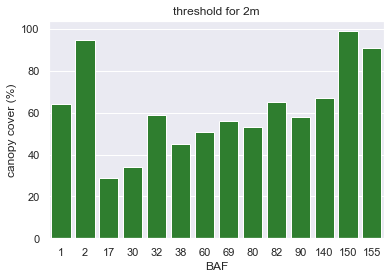

In [69]:
# Now, plot these to compare. 
sns.barplot(data=df, x='BAF', y='canopy_cover_2m', color='forestgreen', label='2m')
plt.ylabel('canopy cover (%)')
plt.title('threshold for 2m')

In [70]:
# create a version of this dataframe, df2, which uses a variable hue to show the different canopy cover values
df2 = pd.melt(df, id_vars=['BAF'], value_vars=['canopy_cover_2m', 'canopy_cover_3m', 'canopy_cover_4m'], var_name='threshold', value_name='canopy_cover')
df2.head()

,BAF,threshold,canopy_cover
0,1,canopy_cover_2m,64
1,2,canopy_cover_2m,95
2,17,canopy_cover_2m,29
3,30,canopy_cover_2m,34
4,32,canopy_cover_2m,59


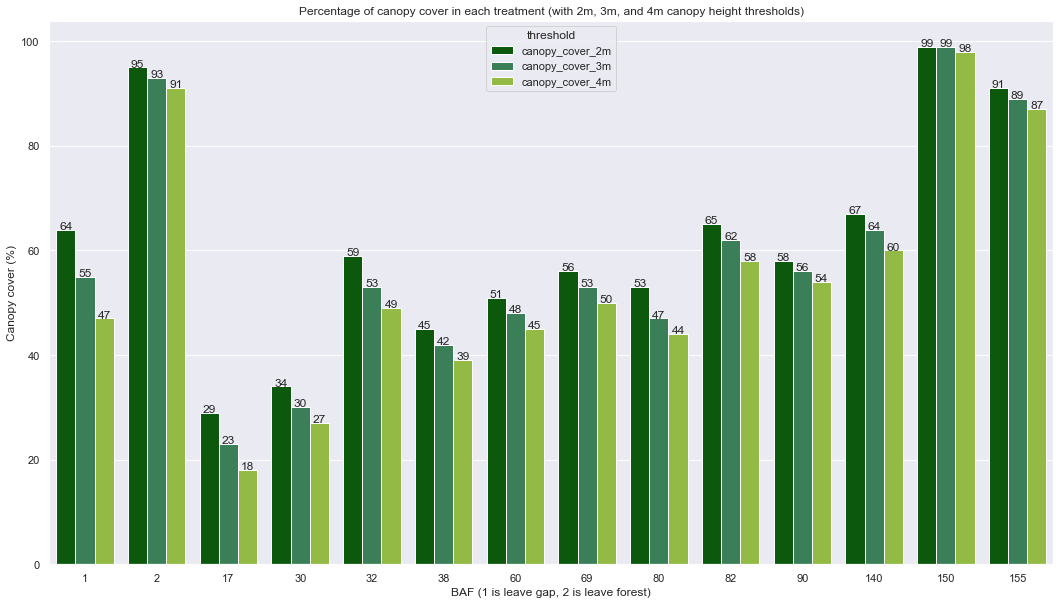

In [71]:
fig = plt.figure(figsize=(18, 10))
color = 'forestgreen'
palette = ['darkgreen', 'seagreen', 'yellowgreen']

# Create a barplot with values
barplot = sns.barplot(data=df2, x='BAF', y='canopy_cover', hue='threshold', palette=palette)

# Add values on top of each bar
for p in barplot.patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2., 
             height + 0.1, 
             '{:1.0f}'.format(height), 
             ha="center")

# Customize the layout
plt.xlabel('BAF (1 is leave gap, 2 is leave forest)')
plt.ylabel('Canopy cover (%)')
plt.title('Percentage of canopy cover in each treatment (with 2m, 3m, and 4m'
          ' canopy height thresholds)')

plt.show()

Now, fix the gap and forest 1 and 2 to read correctly and in the correct locations 

In [72]:
# change the value of df['baf'] 1 to 'leave gap' and 2 to 'leave forest'
df['BAF'] = df['BAF'].replace({1: 'leave gap', 2: 'leave forest', 17: 'BAF 17', 30: 'BAF 30', 32: 'BAF 32', 38: 'BAF 38', 
                                       60: 'BAF 60', 69: 'BAF 69', 80: 'BAF 80', 82: 'BAF 82', 90: 'BAF 90', 140: 'BAF 140', 150: 'BAF 150', 155: 'BAF 155'})

# move the leave forest to the last place in the dataframe
df = df.reindex([0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1])

df.head()

,BAF,canopy_cover_2m,canopy_cover_3m,canopy_cover_4m
0,leave gap,64,55,47
2,BAF 17,29,23,18
3,BAF 30,34,30,27
4,BAF 32,59,53,49
5,BAF 38,45,42,39


Text(0.5, 0, 'treatment units')

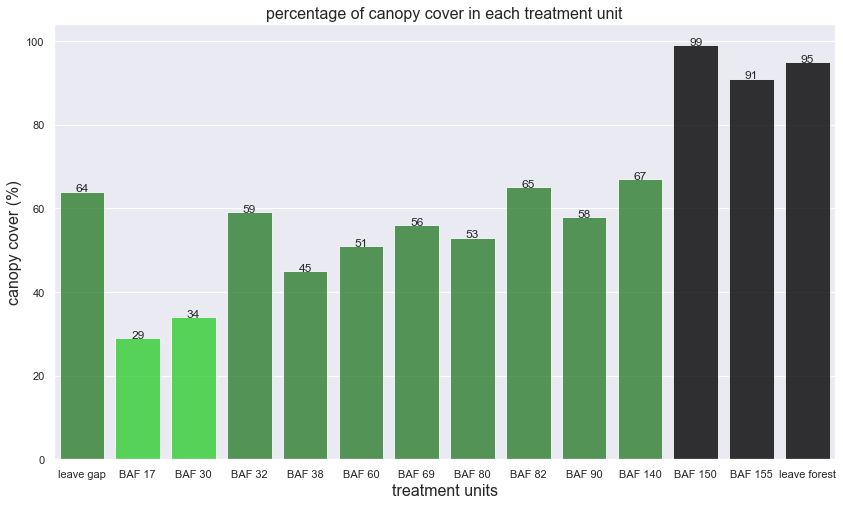

In [73]:
# Now, plot these to compare. 
fig = plt.figure(figsize=(14, 8))

ax = sns.barplot(data=df, x='BAF', y='canopy_cover_2m', color='forestgreen', alpha=0.8)

# add the number to the top of the bars
for index, value in enumerate(df['canopy_cover_2m']):
    plt.text(index, value, str(value), ha='center')

# Change the colors of the 2nd and 3rd bars
ax.patches[1].set_facecolor('limegreen')
ax.patches[2].set_facecolor('limegreen')

ax.patches[11].set_facecolor('black')
ax.patches[12].set_facecolor('black')
ax.patches[13].set_facecolor('black')

plt.title('percentage of canopy cover in each treatment unit', fontsize=16)
# plt.ylabel('canopy cover (%)\n2m canopy height threshold', fontsize=16)
plt.ylabel('canopy cover (%)', fontsize=16)

plt.xlabel('treatment units', fontsize=16)

Text(0.5, 0, 'treatment units')

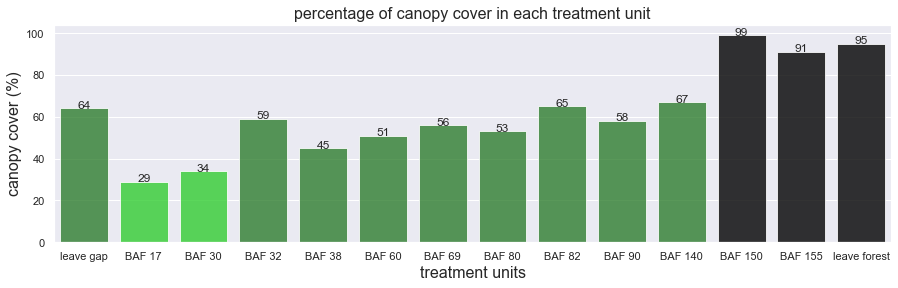

In [74]:
# Now, plot these to compare. 
fig = plt.figure(figsize=(15, 4))

ax = sns.barplot(data=df, x='BAF', y='canopy_cover_2m', color='forestgreen', alpha=0.8)

# add the number to the top of the bars
for index, value in enumerate(df['canopy_cover_2m']):
    plt.text(index, value, str(value), ha='center')

# Change the colors of the 2nd and 3rd bars
ax.patches[1].set_facecolor('limegreen')
ax.patches[2].set_facecolor('limegreen')

ax.patches[11].set_facecolor('black')
ax.patches[12].set_facecolor('black')
ax.patches[13].set_facecolor('black')

plt.title('percentage of canopy cover in each treatment unit', fontsize=16)
# plt.ylabel('canopy cover (%)\n2m canopy height threshold', fontsize=16)
plt.ylabel('canopy cover (%)', fontsize=16)

plt.xlabel('treatment units', fontsize=16)

Plot with the DCE figure so that everything is scaled together

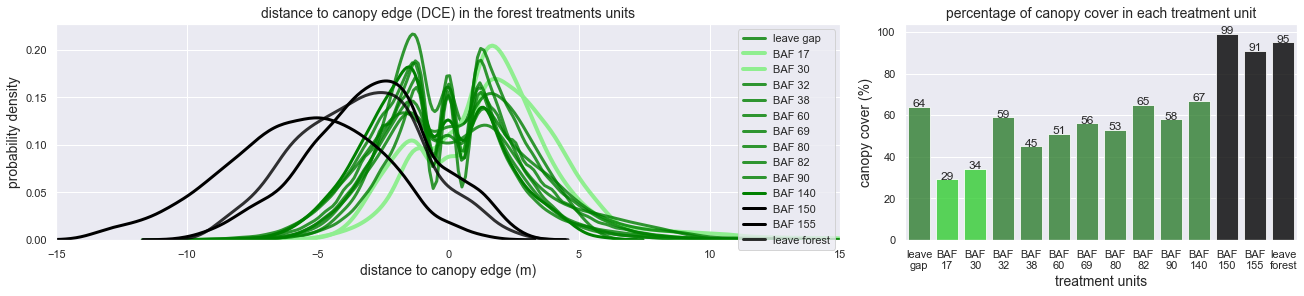

In [21]:
fig, axes = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(18,4), constrained_layout = True,
                         gridspec_kw={'width_ratios': [2, 1]})

colorlow = 'lightgreen';colormed = 'green';colorhigh = 'black'
alpha_num = 0.8
fontsize_num = 14

# first plot _________________________________________________________
sns.kdeplot(ds['dce_rapid_baf_new_1'].values.flatten(), ax=axes[0], color=colormed, label='leave gap', cumulative=False, linewidth=3, alpha=alpha_num)

sns.kdeplot(ds['dce_rapid_baf_new_17'].values.flatten(), ax=axes[0], color=colorlow, label='BAF 17', cumulative=False, linewidth=4)
sns.kdeplot(ds['dce_rapid_baf_new_30'].values.flatten(), ax=axes[0], color=colorlow, label='BAF 30', cumulative=False, linewidth=4)
sns.kdeplot(ds['dce_rapid_baf_new_32'].values.flatten(), ax=axes[0], color=colormed, label='BAF 32', cumulative=False, linewidth=3, alpha=alpha_num)
sns.kdeplot(ds['dce_rapid_baf_new_38'].values.flatten(), ax=axes[0], color=colormed, label='BAF 38', cumulative=False, linewidth=3, alpha=alpha_num)
sns.kdeplot(ds['dce_rapid_baf_new_60'].values.flatten(), ax=axes[0], color=colormed, label='BAF 60', cumulative=False, linewidth=3, alpha=alpha_num)
sns.kdeplot(ds['dce_rapid_baf_new_69'].values.flatten(), ax=axes[0], color=colormed, label='BAF 69', cumulative=False, linewidth=3, alpha=alpha_num)
sns.kdeplot(ds['dce_rapid_baf_new_80'].values.flatten(), ax=axes[0], color=colormed, label='BAF 80', cumulative=False, linewidth=3, alpha=alpha_num)
sns.kdeplot(ds['dce_rapid_baf_new_82'].values.flatten(), ax=axes[0], color=colormed, label='BAF 82', cumulative=False, linewidth=3, alpha=alpha_num)
sns.kdeplot(ds['dce_rapid_baf_new_90'].values.flatten(), ax=axes[0], color=colormed, label='BAF 90', cumulative=False, linewidth=3, alpha=alpha_num)
sns.kdeplot(ds['dce_rapid_baf_new_140'].values.flatten(), ax=axes[0], color=colormed, label='BAF 140', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_150'].values.flatten(), ax=axes[0], color=colorhigh, label='BAF 150', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_155'].values.flatten(), ax=axes[0], color=colorhigh, label='BAF 155', cumulative=False, linewidth=3)

sns.kdeplot(ds['dce_rapid_baf_new_2'].values.flatten(), ax=axes[0], color=colorhigh, label='leave forest', cumulative=False, linewidth=3, alpha=alpha_num)

# labels
axes[0].set_title('distance to canopy edge (DCE) in the forest treatments units', fontsize=fontsize_num)
axes[0].set_xlabel('distance to canopy edge (m)', fontsize=fontsize_num)
axes[0].set_ylabel('probability density', fontsize=fontsize_num)
axes[0].set_xlim(-15,15)

axes[0].legend(loc='upper right')

# second plot _________________________________________________________
ax = sns.barplot(data=df, x='BAF', y='canopy_cover_2m', color='forestgreen', ax=axes[1], alpha=0.8)

# add the number to the top of the bars
for index, value in enumerate(df['canopy_cover_2m']):
    plt.text(index, value, str(value), ha='center')

# Change the colors of the 2nd and 3rd bars
ax.patches[1].set_facecolor('limegreen')
ax.patches[2].set_facecolor('limegreen')

ax.patches[11].set_facecolor('black')
ax.patches[12].set_facecolor('black')
ax.patches[13].set_facecolor('black')

axes[1].set_title('percentage of canopy cover in each treatment unit', fontsize=fontsize_num)
axes[1].set_ylabel('canopy cover (%)', fontsize=fontsize_num)
axes[1].set_xlabel('treatment units', fontsize=fontsize_num)

# adjust the xtick marks in the second plot to be more readable
axes[1].set_xticklabels(['leave\ngap', 'BAF\n17', 'BAF\n30', 'BAF\n32', 'BAF\n38', 'BAF\n60', 'BAF\n69', 'BAF\n80', 'BAF\n82', 'BAF\n90', 'BAF\n140', 'BAF\n150', 'BAF\n155', 'leave\nforest'])
plt.show()

### Now, calculate % canopy cover before the treatments 

In [75]:
# Initialize the DataFrame
df_pre = pd.DataFrame(columns=['BAF', 'canopy_cover_2m', 'canopy_cover_3m', 'canopy_cover_4m'])
df_pre['BAF'] = [1, 2, 17, 30, 32, 38, 60, 69, 80, 82, 90, 140, 150, 155]

# Loop through the BAF values and calculate the percentage of canopy cover
for index, row in df_pre.iterrows():
    BAF = row['BAF']
    
    # Define the canopy cover threshold
    canopy_threshold = 2

    # Determine the canopy grid cells
    canopy_mask = ds['chm_snowoff'] > canopy_threshold

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds['baf_new'].where(ds['baf_new'] == BAF)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100

    # Update the DataFrame with the percentage of canopy cover
    df_pre.at[index, 'canopy_cover_2m'] = percentage_canopy_cover.values.astype(int)
    
    # Now, do the same thing for a canopy threshold of 3 meters 
    canopy_threshold = 3

    # Determine the canopy grid cells
    canopy_mask = ds['chm_snowoff'] > canopy_threshold

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds['baf_new'].where(ds['baf_new'] == BAF)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100

    # Update the DataFrame with the percentage of canopy cover
    df_pre.at[index, 'canopy_cover_3m'] = percentage_canopy_cover.values.astype(int)
    
    # Now, do the same thing for a canopy threshold of 4 meters 
    canopy_threshold = 4

    # Determine the canopy grid cells
    canopy_mask = ds['chm_snowoff'] > canopy_threshold

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds['baf_new'].where(ds['baf_new'] == BAF)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100

    # Update the DataFrame with the percentage of canopy cover
    df_pre.at[index, 'canopy_cover_4m'] = percentage_canopy_cover.values.astype(int)
    

# Print the DataFrame
print(df_pre)

    BAF canopy_cover_2m canopy_cover_3m canopy_cover_4m
0     1              55              40              26
1     2              98              95              93
2    17              40              23              13
3    30              34              27              24
4    32              95              93              90
5    38              95              93              92
6    60              83              78              75
7    69              80              74              70
8    80              98              95              90
9    82              90              87              84
10   90              98              96              94
11  140              75              70              65
12  150              99              99              99
13  155              93              88              86


In [77]:
# change the type to integer for all columns 
df_pre = df_pre.astype(int)

# create a version of this dataframe, df2, which uses a variable hue to show the different canopy cover values
df2_pre = pd.melt(df_pre, id_vars=['BAF'], value_vars=['canopy_cover_2m', 'canopy_cover_3m', 'canopy_cover_4m'], var_name='threshold', value_name='canopy_cover')

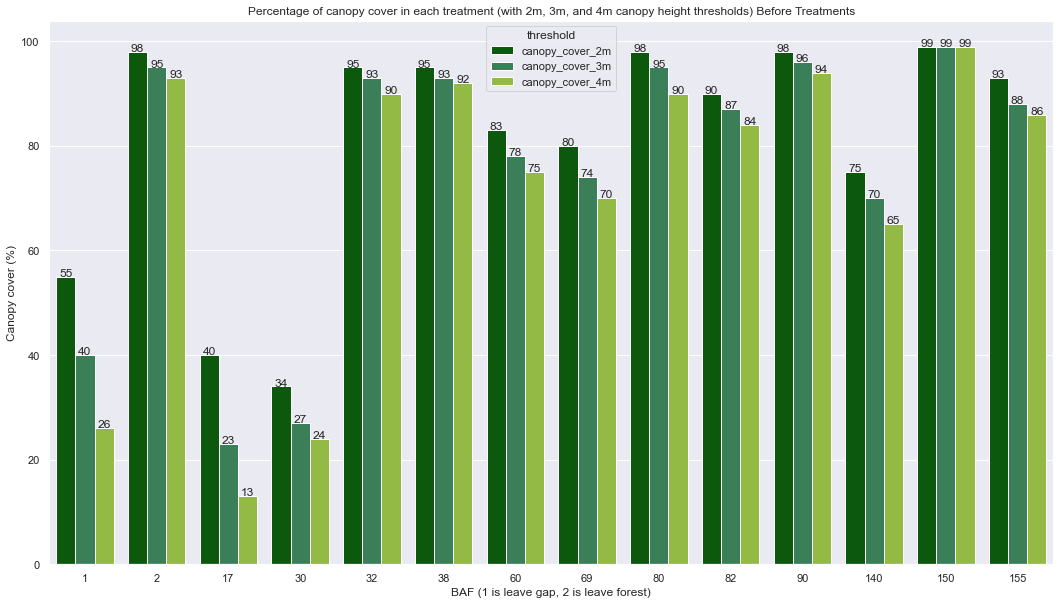

In [78]:
fig = plt.figure(figsize=(18, 10))
color = 'forestgreen'
palette = ['darkgreen', 'seagreen', 'yellowgreen']

# Create a barplot with values
barplot = sns.barplot(data=df2_pre, x='BAF', y='canopy_cover', hue='threshold', palette=palette)

# Add values on top of each bar
for p in barplot.patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2., 
             height + 0.1, 
             '{:1.0f}'.format(height), 
             ha="center")

# Customize the layout
plt.xlabel('BAF (1 is leave gap, 2 is leave forest)')
plt.ylabel('Canopy cover (%)')
plt.title('Percentage of canopy cover in each treatment (with 2m, 3m, and 4m'
          ' canopy height thresholds) Before Treatments')

plt.show()

In [79]:
# for both datasets, only save for 2m threshold 
df2_pre = df2_pre[df2_pre['threshold'] == 'canopy_cover_2m']
df2_pos = df2[df2['threshold'] == 'canopy_cover_2m']

In [80]:
# Now merge df2_pos and df2_pre and create a new column to determine pre and pos 
df2_pre['treatment'] = 'WY2021 before treatments'
df2_pos['treatment'] = 'WY2023 after treatments'

df2_all = pd.concat([df2_pre, df2_pos])

# drop the threshold column
df2_all = df2_all.drop(columns=['threshold'])
df2_all.reset_index(drop=True, inplace=True)
df2_all_fix = df2_all.reindex([0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 15])


df2_all_fix['BAF'] = df2_all_fix['BAF'].replace({1: 'leave gap', 2: 'leave forest', 17: 'BAF 17', 30: 'BAF 30', 32: 'BAF 32', 38: 'BAF 38', 
                                       60: 'BAF 60', 69: 'BAF 69', 80: 'BAF 80', 82: 'BAF 82', 90: 'BAF 90', 140: 'BAF 140', 150: 'BAF 150', 155: 'BAF 155',
                                       1: 'leave gap', 2: 'leave forest', 17: 'BAF 17', 30: 'BAF 30', 32: 'BAF 32', 38: 'BAF 38', 
                                       60: 'BAF 60', 69: 'BAF 69', 80: 'BAF 80', 82: 'BAF 82', 90: 'BAF 90', 140: 'BAF 140', 150: 'BAF 150', 155: 'BAF 155'})

df2_all_fix.head()

C:\Users\Lumbr\AppData\Local\Temp\ipykernel_34460\4229083290.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_pos['treatment'] = 'WY2023 after treatments'


,BAF,canopy_cover,treatment
0,leave gap,55,WY2021 before treatments
2,BAF 17,40,WY2021 before treatments
3,BAF 30,34,WY2021 before treatments
4,BAF 32,95,WY2021 before treatments
5,BAF 38,95,WY2021 before treatments


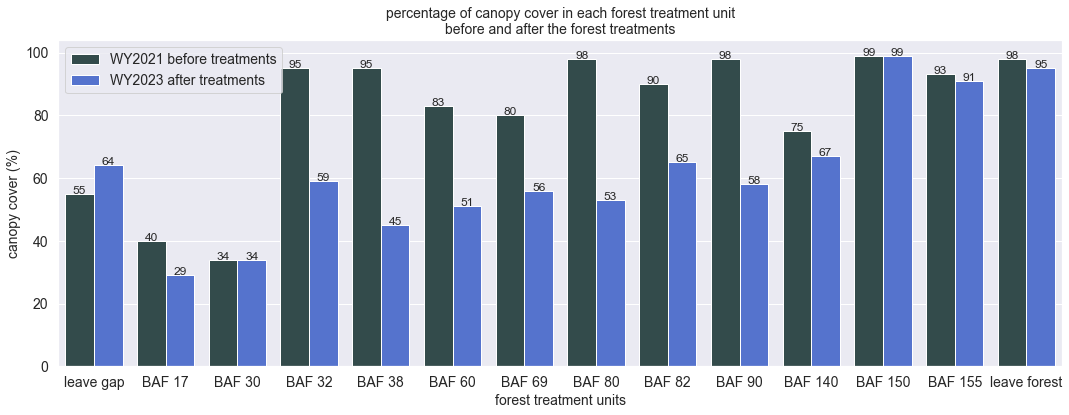

In [81]:
fig = plt.figure(figsize=(18, 6))
palette = [colorpre, colorpos]

fontsize_num = 14

# Create a barplot with values
barplot = sns.barplot(data=df2_all_fix, x='BAF', y='canopy_cover', hue='treatment', palette=palette)

# Add values on top of each bar
for p in barplot.patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2., 
             height + 0.1, 
             '{:1.0f}'.format(height), 
             ha="center")

# Customize the layout
plt.xlabel('forest treatment units', fontsize=fontsize_num)
plt.ylabel('canopy cover (%)', fontsize=fontsize_num)
plt.title('percentage of canopy cover in each forest treatment unit\nbefore and after the forest treatments', fontsize=fontsize_num)
plt.legend(loc='upper left', fontsize=fontsize_num)

# increase the size of the xtick labels
plt.xticks(fontsize=fontsize_num)

# # change the ylabel to be on the right side of the figure instead 
plt.yticks(fontsize=fontsize_num)
# plt.gca().yaxis.set_label_position("right")
# plt.gca().yaxis.tick_right()

plt.show()

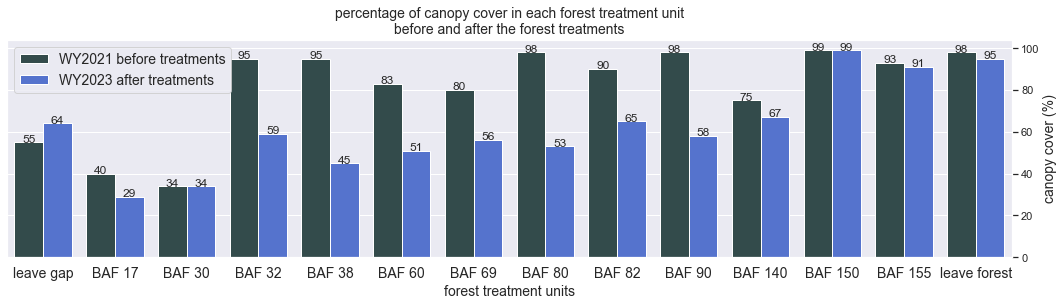

In [82]:
fig = plt.figure(figsize=(18, 4))
palette = [colorpre, colorpos]

fontsize_num = 14

# Create a barplot with values
barplot = sns.barplot(data=df2_all_fix, x='BAF', y='canopy_cover', hue='treatment', palette=palette)

# Add values on top of each bar
for p in barplot.patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2., 
             height + 0.1, 
             '{:1.0f}'.format(height), 
             ha="center")

# Customize the layout
plt.xlabel('forest treatment units', fontsize=fontsize_num)
plt.ylabel('canopy cover (%)', fontsize=fontsize_num)
plt.title('percentage of canopy cover in each forest treatment unit\nbefore and after the forest treatments', fontsize=fontsize_num)
plt.legend(loc='upper left', fontsize=fontsize_num)

# increase the size of the xtick labels
plt.xticks(fontsize=fontsize_num)

# change the ylabel to be on the right side of the figure instead 
plt.yticks(fontsize=fontsize_num)
plt.gca().yaxis.set_label_position("right")
plt.gca().yaxis.tick_right()

plt.show()